# Final Project Code - EV Analysis
Jennifer Zhuang

## Our Original Data

In [1]:
import pandas as pd
df = pd.read_csv('NY_gasoline_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402 entries, 0 to 401
Data columns (total 51 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Date                                                          402 non-null    object 
 1   New York State Average ($/gal)                                402 non-null    float64
 2   Albany Average ($/gal)                                        402 non-null    float64
 3   Batavia Average ($/gal)                                       400 non-null    float64
 4   Binghamton Average ($/gal)                                    402 non-null    float64
 5   Buffalo Average ($/gal)                                       402 non-null    float64
 6   Dutchess Average ($/gal)                                      402 non-null    float64
 7   Elmira Average ($/gal)                                        402 non-n

- The first step is to break apart our dataset and create three new columns:
  - Region
  - Region Gas Cost \$/gal
  - Region Diesel Cost \$/gal

In [2]:
# Define gasoline and diesel columns
gasoline_columns = [
    "Albany Average ($/gal)",
    "Batavia Average ($/gal)",
    "Binghamton Average ($/gal)",
    "Buffalo Average ($/gal)",
    "Dutchess Average ($/gal)",
    "Elmira Average ($/gal)",
    "Glens Falls Average ($/gal)",
    "Ithaca Average ($/gal)",
    "Kingston Average ($/gal)",
    "Nassau Average ($/gal)",
    "New York City Average ($/gal)",
    "Rochester Average ($/gal)",
    "Syracuse Average ($/gal)",
    "Utica Average ($/gal)",
    "Watertown Average ($/gal)",
    "White Plains Average ($/gal)"
]

diesel_columns = [
    "Albany Average ($/gal)Diesel",
    "Batavia Average ($/gal)Diesel",
    "Binghamton Average ($/gal)Diesel",
    "Buffalo Average ($/gal)Diesel",
    "Dutchess Average ($/gal)Diesel",
    "Elmira Average ($/gal)Diesel",
    "Glens Falls Average ($/gal)Diesel",
    "Ithaca Average ($/gal)Diesel",
    "Kingston Average ($/gal)Diesel",
    "Nassau Average ($/gal)Diesel",
    "New York City Average ($/gal)Diesel",
    "Rochester Average ($/gal)Diesel",
    "Syracuse Average ($/gal)Diesel",
    "Utica Average ($/gal)Diesel",
    "Watertown Average ($/gal)Diesel",
    "White Plains Average ($/gal)Diesel"
]

# Melt gasoline columns
gasoline_melted = df.melt(
    id_vars=[col for col in df.columns if col not in gasoline_columns + diesel_columns],  # Keep other columns
    value_vars=gasoline_columns,
    var_name="Region",
    value_name="Region Gas Cost ($/gal)"
)
gasoline_melted["Region"] = gasoline_melted["Region"].str.replace(" Average \\(\\$/gal\\)", "", regex=True)

# Melt diesel columns
diesel_melted = df.melt(
    id_vars=[col for col in df.columns if col not in gasoline_columns + diesel_columns],  # Keep other columns
    value_vars=diesel_columns,
    var_name="Region",
    value_name="Region Diesel Cost ($/gal)"
)
diesel_melted["Region"] = diesel_melted["Region"].str.replace(" Average \\(\\$/gal\\)Diesel", "", regex=True)

# Merge gasoline and diesel costs directly
result = pd.merge(
    gasoline_melted,
    diesel_melted,
    on=["Date", "Region"] + [col for col in df.columns if col not in gasoline_columns + diesel_columns],
    how="outer"
)

# Drop any duplicated or unnecessary columns if needed
result = result.loc[:, ~result.columns.duplicated()]

# Display result
print(result.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6432 entries, 0 to 6431
Data columns (total 22 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Date                                                          6432 non-null   object 
 1   New York State Average ($/gal)                                6432 non-null   float64
 2   East Coast Production of Gasoline (Thousand Barrels per Day)  6416 non-null   float64
 3   East Coast Production of Jet Fuel (Thousand Barrels per Day)  6416 non-null   float64
 4   U.S. Production of Gasoline (Thousand Barrels per Day)        6416 non-null   float64
 5   U.S. Gasoline Demand (Thousand Barrels per Day)               6416 non-null   float64
 6   U.S. Production of Jet Fuel (Thousand Barrels per Day)        6416 non-null   float64
 7   NY Conventional Gasoline Spot Price ($/gal)                   6432 no

In [3]:
result.head()

,Date,New York State Average ($/gal),East Coast Production of Gasoline (Thousand Barrels per Day),East Coast Production of Jet Fuel (Thousand Barrels per Day),U.S. Production of Gasoline (Thousand Barrels per Day),U.S. Gasoline Demand (Thousand Barrels per Day),U.S. Production of Jet Fuel (Thousand Barrels per Day),NY Conventional Gasoline Spot Price ($/gal),NY Ultra-Low Sulfur Diesel Spot Price ($/gal),WTI Crude Oil Spot Price ($/barrel),...,Mid-Atlantic Gasoline Stocks (Thousand Barrels),East Coast Gasoline Stocks (Thousand Barrels),East Coast Ethanol Stocks (Thousand Barrels),East Coast Jet Fuels Stocks (Thousand Barrels),U.S. Gasoline Stocks (Thousand Barrels),U.S. Crude Oil Stocks (Thousand Barrels),New York State Average ($/gal)Diesel,Region,Region Gas Cost ($/gal),Region Diesel Cost ($/gal)
0,1/2/17,2.52,NaN,NaN,NaN,NaN,NaN,0.00,0.00,53.60,...,NaN,NaN,NaN,NaN,NaN,NaN,2.73,Albany,2.44,2.66
1,1/9/17,2.54,2830.0,78.0,9666.0,8470.0,1707.0,1.69,1.67,53.34,...,35086.0,67292.0,6710.0,10640.0,240473.0,483109.0,2.75,Albany,2.46,2.67
2,1/16/17,2.54,2883.0,69.0,8953.0,8069.0,1621.0,1.63,1.62,52.07,...,36289.0,70693.0,7181.0,9950.0,246424.0,485456.0,2.76,Albany,2.45,2.68
3,1/23/17,2.53,2960.0,72.0,8825.0,8039.0,1650.0,1.61,1.61,51.82,...,36639.0,71597.0,7634.0,9538.0,253220.0,488296.0,2.75,Albany,2.43,2.68
4,1/30/17,2.51,2886.0,87.0,9101.0,8310.0,1637.0,1.57,1.59,52.74,...,39686.0,73540.0,7571.0,10971.0,257086.0,494762.0,2.75,Albany,2.40,2.67


In [4]:
result['Region'].unique()

array(['Albany', 'Batavia', 'Binghamton', 'Buffalo', 'Dutchess', 'Elmira',
       'Glens Falls', 'Ithaca', 'Kingston', 'Nassau', 'New York City',
       'Rochester', 'Syracuse', 'Utica', 'Watertown', 'White Plains'],
      dtype=object)

### Region / County Data 
- Some of the datasets have county instead of Region
- We create a mapping of all 62 counties in New York State to a Region

In [5]:
county_to_area = [
    ("Madison", "Syracuse"),
    ("Onondaga", "Syracuse"),
    ("Queens", "New York City"),
    ("Westchester", "White Plains"),
    ("New York", "New York City"),
    ("Herkimer", "Utica"),
    ("Oneida", "Utica"),
    ("Monroe", "Rochester"),
    ("Wayne", "Rochester"),
    ("Suffolk", "New York City"),
    ("Orange", "Dutchess"),
    ("Nassau", "Nassau"),
    ("Erie", "Buffalo"),
    ("Kings", "New York City"),
    ("Tompkins", "Ithaca"),
    ("Albany", "Albany"),
    ("Broome", "Binghamton"),
    ("Ontario", "Rochester"),
    ("Ulster", "Kingston"),
    ("Saratoga", "Glens Falls"),
    ("Cayuga", "Syracuse"),
    ("Oswego", "Syracuse"),
    ("Bronx", "New York City"),
    ("Jefferson", "Watertown"),
    ("Warren", "Glens Falls"),
    ("Dutchess", "Dutchess"),
    ("Putnam", "White Plains"),
    ("Rockland", "White Plains"),
    ("Columbia", "Albany"),
    ("Schenectady", "Albany"),
    ("Steuben", "Elmira"),
    ("Yates", "Rochester"),
    ("Richmond", "New York City"),
    ("Niagara", "Buffalo"),
    ("Cattaraugus", "Buffalo"),
    ("Cortland", "Binghamton"),
    ("Lewis", "Watertown"),
    ("St. Lawrence", "Watertown"),
    ("Chautauqua", "Buffalo"),
    ("Sullivan", "Kingston"),
    ("Rensselaer", "Albany"),
    ("Tioga", "Binghamton"),
    ("Essex", "Glens Falls"),
    ("Chemung", "Elmira"),
    ("Seneca", "Rochester"),
    ("Otsego", "Utica"),
    ("Schoharie", "Albany"),
    ("Delaware", "Binghamton"),
    ("Livingston", "Rochester"),
    ("Orleans", "Buffalo"),
    ("Washington", "Glens Falls"),
    ("Schuyler", "Elmira"),
    ("Allegany", "Elmira"),
    ("Genesee", "Batavia"),
    ("Chenango", "Binghamton"),
    ("Greene", "Albany"),
    ("Fulton", "Albany"),
    ("Montgomery", "Albany"),
    ("Clinton", "Glens Falls"),
    ("Franklin", "Glens Falls"),
    ("Wyoming", "Buffalo"),
    ("Hamilton", "Glens Falls")
]

## New York EV Registrations 
From New York State Energy Research and Development Authority (NYSERDA) and their EValuateNY dataset: (https://www.nyserda.ny.gov/All-Programs/Drive-Clean-Rebate-For-Electric-Cars-Program/About-Electric-Cars/Data-on-Electric-Vehicles-and-Charging-Stations)

In [6]:
registration_df = pd.read_csv('ny_ev_registrations.csv')
registration_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2810091 entries, 0 to 2810090
Data columns (total 6 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   ZIP Code                 int64 
 1   Registration Valid Date  object
 2   DMV ID                   int64 
 3   Registration             object
 4   VIN Prefix               object
 5   Vehicle ID               int64 
dtypes: int64(3), object(3)
memory usage: 128.6+ MB


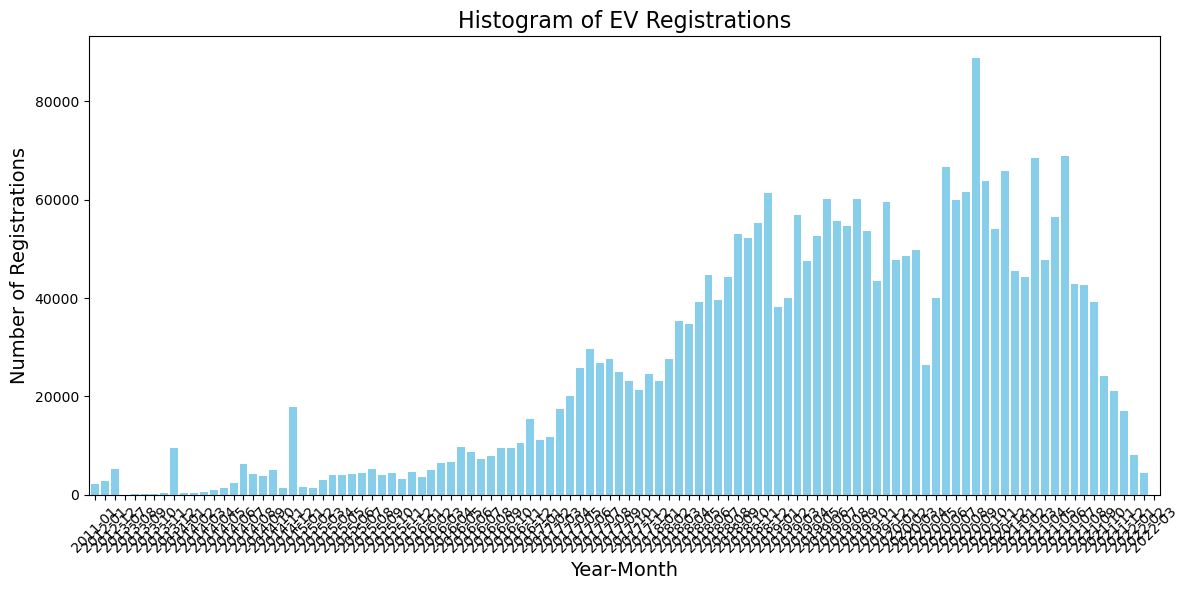

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert Submitted Date to datetime
registration_df['Registration Valid Date'] = pd.to_datetime(registration_df['Registration Valid Date'])

# Group by month
registration_df['YearMonth'] = registration_df['Registration Valid Date'].dt.to_period('M')
submission_counts = registration_df.groupby('YearMonth').size()

# Plot the histogram
plt.figure(figsize=(12, 6))
submission_counts.plot(kind='bar', width=0.8, color='skyblue')
plt.title('Histogram of EV Registrations', fontsize=16)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Number of Registrations', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

> We need a way to translate zip code info into county info (https://data.ny.gov/Government-Finance/New-York-State-ZIP-Codes-County-FIPS-Cross-Referen/juva-r6g2/data)

In [8]:
region_county_df = pd.read_csv('NY_ZIP_County_Cross-Reference.csv')
region_county_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2543 entries, 0 to 2542
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   County Name  2543 non-null   object
 1   State FIPS   2543 non-null   int64 
 2   County Code  2543 non-null   int64 
 3   County FIPS  2543 non-null   int64 
 4   ZIP Code     2543 non-null   int64 
 5   File Date    2543 non-null   object
dtypes: int64(4), object(2)
memory usage: 119.3+ KB


In [9]:
registration_df = registration_df.merge(
    region_county_df[['ZIP Code', 'County Code', 'County Name']],
    on='ZIP Code',  
    how='left'  
)
print(registration_df.head())

   ZIP Code Registration Valid Date  DMV ID Registration  VIN Prefix   
0     13104              2020-10-01      62     Original  YV4BR0DL7M  \
1     13104              2020-10-01      62     Original  YV4BR0DL7M   
2     13104              2020-10-01      48     Original  YV4BR0DL7M   
3     13104              2020-10-01      48     Original  YV4BR0DL7M   
4     13104              2020-10-01      46     Original  YV4BR0DL7M   

   Vehicle ID YearMonth  County Code County Name  
0    18096911   2020-10         53.0     Madison  
1    18096911   2020-10         67.0    Onondaga  
2    18096911   2020-10         53.0     Madison  
3    18096911   2020-10         67.0    Onondaga  
4    18096911   2020-10         53.0     Madison  


In [10]:
county_to_region = dict(county_to_area)
registration_df['Region'] = registration_df['County Name'].map(county_to_region)

In [11]:
registration_df.head()

,ZIP Code,Registration Valid Date,DMV ID,Registration,VIN Prefix,Vehicle ID,YearMonth,County Code,County Name,Region
0,13104,2020-10-01,62,Original,YV4BR0DL7M,18096911,2020-10,53.0,Madison,Syracuse
1,13104,2020-10-01,62,Original,YV4BR0DL7M,18096911,2020-10,67.0,Onondaga,Syracuse
2,13104,2020-10-01,48,Original,YV4BR0DL7M,18096911,2020-10,53.0,Madison,Syracuse
3,13104,2020-10-01,48,Original,YV4BR0DL7M,18096911,2020-10,67.0,Onondaga,Syracuse
4,13104,2020-10-01,46,Original,YV4BR0DL7M,18096911,2020-10,53.0,Madison,Syracuse


__Combining with our Transportation Fuel Dataset__:

Use datetimes to join the two tables

In [12]:
registration_df['Registration Valid Date'] = pd.to_datetime(registration_df['Registration Valid Date'])
registration_df['Formatted Registration Valid Date'] = registration_df['Registration Valid Date'].dt.strftime('%m/%d/%Y')
registration_df['Week_start'] = registration_df['Registration Valid Date'] - pd.to_timedelta(registration_df['Registration Valid Date'].dt.dayofweek, unit='d')
registration_df['Week_start'] = registration_df['Week_start'].dt.strftime('%m/%d/%Y')
registration_df.head()

,ZIP Code,Registration Valid Date,DMV ID,Registration,VIN Prefix,Vehicle ID,YearMonth,County Code,County Name,Region,Formatted Registration Valid Date,Week_start
0,13104,2020-10-01,62,Original,YV4BR0DL7M,18096911,2020-10,53.0,Madison,Syracuse,10/01/2020,09/28/2020
1,13104,2020-10-01,62,Original,YV4BR0DL7M,18096911,2020-10,67.0,Onondaga,Syracuse,10/01/2020,09/28/2020
2,13104,2020-10-01,48,Original,YV4BR0DL7M,18096911,2020-10,53.0,Madison,Syracuse,10/01/2020,09/28/2020
3,13104,2020-10-01,48,Original,YV4BR0DL7M,18096911,2020-10,67.0,Onondaga,Syracuse,10/01/2020,09/28/2020
4,13104,2020-10-01,46,Original,YV4BR0DL7M,18096911,2020-10,53.0,Madison,Syracuse,10/01/2020,09/28/2020


In [13]:
registration_df['Week_start'] = pd.to_datetime(registration_df['Week_start'], format='%m/%d/%Y')
result['Date'] = pd.to_datetime(result['Date'], format='%m/%d/%y')

# Step 2: Aggregate registration_df by Week_start and Region
aggregated_df = (
    registration_df.groupby(['Week_start', 'Region'])
    .size()  # Count the number of registrations per group
    .reset_index(name='Registration Count')  # Reset index and name the count column
)

# Step 3: Perform an inner join to retain only matching rows
merged_df = pd.merge(
    result,
    aggregated_df,
    left_on=['Date', 'Region'],  # Use 'Date' and 'Region' from result
    right_on=['Week_start', 'Region'],  # Use 'Week_start' and 'Region' from aggregated_df
    how='inner'  # Use inner join to keep only matching rows
)

# Step 4: Drop redundant Week_start column (optional)
merged_df.drop(columns=['Week_start'], inplace=True)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978 entries, 0 to 977
Data columns (total 23 columns):
 #   Column                                                        Non-Null Count  Dtype         
---  ------                                                        --------------  -----         
 0   Date                                                          978 non-null    datetime64[ns]
 1   New York State Average ($/gal)                                978 non-null    float64       
 2   East Coast Production of Gasoline (Thousand Barrels per Day)  978 non-null    float64       
 3   East Coast Production of Jet Fuel (Thousand Barrels per Day)  978 non-null    float64       
 4   U.S. Production of Gasoline (Thousand Barrels per Day)        978 non-null    float64       
 5   U.S. Gasoline Demand (Thousand Barrels per Day)               978 non-null    float64       
 6   U.S. Production of Jet Fuel (Thousand Barrels per Day)        978 non-null    float64       
 7   NY Conve

In [14]:
merged_df.head()

,Date,New York State Average ($/gal),East Coast Production of Gasoline (Thousand Barrels per Day),East Coast Production of Jet Fuel (Thousand Barrels per Day),U.S. Production of Gasoline (Thousand Barrels per Day),U.S. Gasoline Demand (Thousand Barrels per Day),U.S. Production of Jet Fuel (Thousand Barrels per Day),NY Conventional Gasoline Spot Price ($/gal),NY Ultra-Low Sulfur Diesel Spot Price ($/gal),WTI Crude Oil Spot Price ($/barrel),...,East Coast Gasoline Stocks (Thousand Barrels),East Coast Ethanol Stocks (Thousand Barrels),East Coast Jet Fuels Stocks (Thousand Barrels),U.S. Gasoline Stocks (Thousand Barrels),U.S. Crude Oil Stocks (Thousand Barrels),New York State Average ($/gal)Diesel,Region,Region Gas Cost ($/gal),Region Diesel Cost ($/gal),Registration Count
0,2017-01-30,2.51,2886.0,87.0,9101.0,8310.0,1637.0,1.57,1.59,52.74,...,73540.0,7571.0,10971.0,257086.0,494762.0,2.75,Albany,2.40,2.67,977
1,2017-02-27,2.47,3129.0,71.0,9456.0,8686.0,1562.0,1.53,1.63,54.03,...,75041.0,7815.0,9854.0,255889.0,520184.0,2.73,Albany,2.34,2.64,1158
2,2017-03-27,2.42,3107.0,76.0,10028.0,9524.0,1731.0,1.49,1.50,47.28,...,65648.0,8028.0,10581.0,239721.0,533977.0,2.71,Albany,2.31,2.63,1584
3,2017-05-01,2.54,3267.0,108.0,9783.0,9156.0,1738.0,1.53,1.52,49.12,...,67206.0,8227.0,11262.0,241232.0,527772.0,2.73,Albany,2.46,2.63,1849
4,2017-05-29,2.51,3376.0,87.0,10430.0,9822.0,1701.0,1.61,1.58,50.21,...,68426.0,8009.0,10048.0,237024.0,509912.0,2.70,Albany,2.43,2.61,1780


In [45]:
merged_df['Region'].unique()

array(['Albany', 'Batavia', 'Binghamton', 'Buffalo', 'Dutchess', 'Elmira',
       'Glens Falls', 'Ithaca', 'Kingston', 'Nassau', 'New York City',
       'Rochester', 'Syracuse', 'Utica', 'Watertown', 'White Plains'],
      dtype=object)

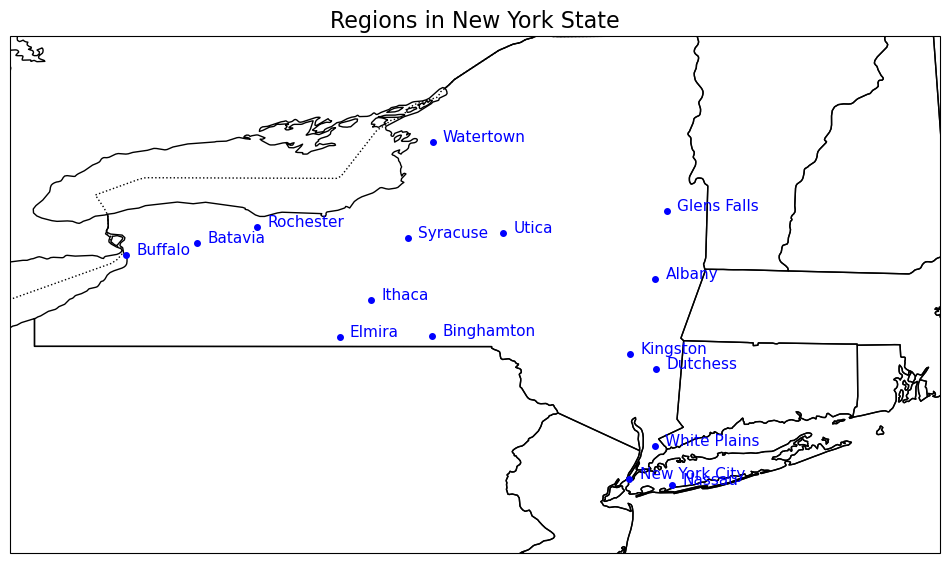

In [55]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Approximate locations of the regions
region_locations = {
    'Albany': (-73.7562, 42.6526),
    'Batavia': (-78.1875, 42.9981),
    'Binghamton': (-75.9180, 42.0987),
    'Buffalo': (-78.8784, 42.8864),
    'Dutchess': (-73.7489, 41.7784),
    'Elmira': (-76.8098, 42.0898),
    'Glens Falls': (-73.6441, 43.3095),
    'Ithaca': (-76.5019, 42.4437),
    'Kingston': (-73.9974, 41.9270),
    'Nassau': (-73.5894, 40.6546),
    'New York City': (-74.0060, 40.7128),
    'Rochester': (-77.6109, 43.1566),
    'Syracuse': (-76.1474, 43.0481),
    'Utica': (-75.2268, 43.1009),
    'Watertown': (-75.9108, 43.9748),
    'White Plains': (-73.7629, 41.0330)
}

# Set up the map with Cartopy
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-80, -71, 40, 45], crs=ccrs.PlateCarree())  # Bounding box for New York State

# Add map features
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES, edgecolor='black')

# Plot region points
for name, (lon, lat) in region_locations.items():
    ax.plot(lon, lat, marker='o', color='blue', markersize=4, transform=ccrs.PlateCarree())
    ax.text(lon + 0.1, lat, name, transform=ccrs.PlateCarree(), fontsize=11, color='blue')

# Title and layout
ax.set_title('Regions in New York State', fontsize=16)
plt.show()


## NYSERDA Electric Vehicle Drive Clean Rebate Data: Beginning 2017

https://data.ny.gov/Energy-Environment/NYSERDA-Electric-Vehicle-Drive-Clean-Rebate-Data-B/thd2-fu8y/data

        New York State’s Charge NY initiative offers electric car buyers the Drive Clean Rebate of up to $2,000 for new car purchases or leases. The rebate amount depends on the battery-only range of each vehicle. Dealers enrolled in the program deduct the eligible amount from the vehicle price at the point of sale and then submit a rebate application with NYSERDA. This dataset includes all completed rebate applications as of the data through date.

In [15]:
ev_df = pd.read_csv('NY_EV_data.csv')
ev_df = pd.merge(
    ev_df,
    region_county_df[['ZIP Code', 'County Code', 'County Name']],  
    left_on='ZIP',  
    right_on='ZIP Code', 
    how='left'  
)
ev_df.drop(columns=['ZIP Code'], inplace=True)
ev_df['Region'] = ev_df['County Name'].map(county_to_region)
print(ev_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199280 entries, 0 to 199279
Data columns (total 14 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Data through Date                          199280 non-null  object 
 1   Submitted Date                             199280 non-null  object 
 2   Make                                       199280 non-null  object 
 3   Model                                      199278 non-null  object 
 4   County                                     199274 non-null  object 
 5   ZIP                                        199279 non-null  float64
 6   EV Type                                    199280 non-null  object 
 7   Transaction Type                           199274 non-null  object 
 8   Annual GHG Emissions Reductions (MT CO2e)  199280 non-null  float64
 9   Annual Petroleum Reductions (gallons)      199280 non-null  float64
 10  Rebate A

In [16]:
ev_df['Submitted Date'] = pd.to_datetime(ev_df['Submitted Date'])
ev_df['Formatted Submitted Date'] = ev_df['Submitted Date'].dt.strftime('%-m/%-d/%y')

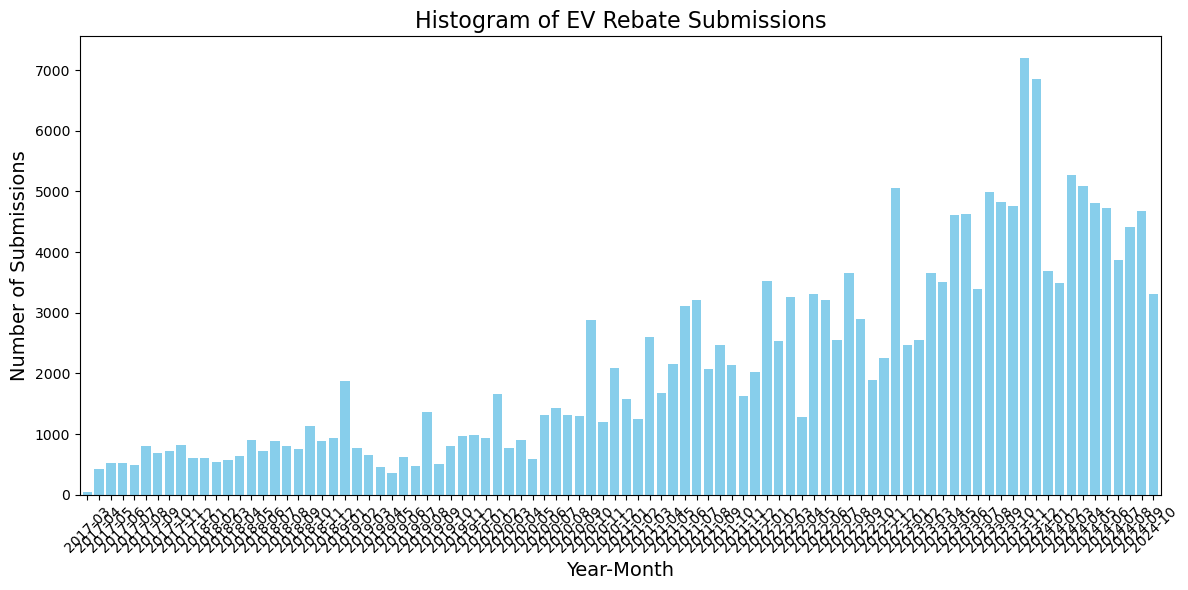

In [17]:
ev_df['YearMonth'] = ev_df['Submitted Date'].dt.to_period('M')
submission_counts = ev_df.groupby('YearMonth').size()

# Plot the histogram
plt.figure(figsize=(12, 6))
submission_counts.plot(kind='bar', width=0.8, color='skyblue')
plt.title('Histogram of EV Rebate Submissions', fontsize=16)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Number of Submissions', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

In [18]:
ev_df['Submitted Date'] = pd.to_datetime(ev_df['Submitted Date'])
ev_df['Formatted Submitted Date'] = ev_df['Submitted Date'].dt.strftime('%m/%d/%Y')
ev_df['Week_start'] = ev_df['Submitted Date'] - pd.to_timedelta(ev_df['Submitted Date'].dt.dayofweek, unit='d')
ev_df['Week_start'] = ev_df['Week_start'].dt.strftime('%m/%d/%Y')
ev_df.head()

,Data through Date,Submitted Date,Make,Model,County,ZIP,EV Type,Transaction Type,Annual GHG Emissions Reductions (MT CO2e),Annual Petroleum Reductions (gallons),Rebate Amount (USD),County Code,County Name,Region,Formatted Submitted Date,YearMonth,Week_start
0,10/31/2024,2020-05-28,Tesla,Model Y,NaN,10509.0,BEV,Purchase,3.093,592.890,2000,79.0,Putnam,White Plains,05/28/2020,2020-05,05/25/2020
1,10/31/2024,2020-05-28,Tesla,Model Y,NaN,10509.0,BEV,Purchase,3.093,592.890,2000,119.0,Westchester,White Plains,05/28/2020,2020-05,05/25/2020
2,10/31/2024,2023-08-30,Chevrolet,Bolt,NaN,NaN,BEV,Purchase,3.018,592.890,2000,NaN,NaN,NaN,08/30/2023,2023-08,08/28/2023
3,10/31/2024,2023-11-08,Jeep,Grand Cherokee,NaN,13647.0,PHEV,Lease,0.089,247.229,500,89.0,St. Lawrence,Watertown,11/08/2023,2023-11,11/06/2023
4,10/31/2024,2024-06-10,Cadillac,Lyriq,NaN,13669.0,BEV,Purchase,2.418,592.890,500,89.0,St. Lawrence,Watertown,06/10/2024,2024-06,06/10/2024


In [19]:
aggregated_ev_df = (
    ev_df.groupby(['Region', 'Week_start'], as_index=False)
    .agg(
        ev_rebate_count=('Rebate Amount (USD)', 'count'),  # Count of EV registrations
        avg_ghg_reductions=('Annual GHG Emissions Reductions (MT CO2e)', 'mean'),  # Average GHG reductions
        avg_petroleum_reductions=('Annual Petroleum Reductions (gallons)', 'mean'),  # Average petroleum reductions
        avg_rebate_amount=('Rebate Amount (USD)', 'mean')  # Average rebate amount
    )
)

print(aggregated_ev_df.head())

   Region  Week_start  ev_rebate_count  avg_ghg_reductions   
0  Albany  01/01/2018                7            2.582286  \
1  Albany  01/01/2024               55            2.250436   
2  Albany  01/02/2023               43            2.193302   
3  Albany  01/03/2022               50            2.842180   
4  Albany  01/04/2021               14            2.286714   

   avg_petroleum_reductions  avg_rebate_amount  
0                472.925571        1400.000000  
1                507.228345         636.363636  
2                493.283558         883.720930  
3                575.159340         610.000000  
4                421.077857        1207.142857  


In [20]:
aggregated_ev_df['Week_start'] = pd.to_datetime(aggregated_ev_df['Week_start'], format='%m/%d/%Y')
merged_df['Date'] = pd.to_datetime(merged_df['Date'], format='%m/%d/%Y')
final_df = pd.merge(
    merged_df,
    aggregated_ev_df,
    left_on=['Date', 'Region'], 
    right_on=['Week_start', 'Region'],  
    how='inner'  
)
final_df.drop(columns=['Week_start'], inplace=True)
print(final_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 27 columns):
 #   Column                                                        Non-Null Count  Dtype         
---  ------                                                        --------------  -----         
 0   Date                                                          881 non-null    datetime64[ns]
 1   New York State Average ($/gal)                                881 non-null    float64       
 2   East Coast Production of Gasoline (Thousand Barrels per Day)  881 non-null    float64       
 3   East Coast Production of Jet Fuel (Thousand Barrels per Day)  881 non-null    float64       
 4   U.S. Production of Gasoline (Thousand Barrels per Day)        881 non-null    float64       
 5   U.S. Gasoline Demand (Thousand Barrels per Day)               881 non-null    float64       
 6   U.S. Production of Jet Fuel (Thousand Barrels per Day)        881 non-null    float64       
 7   NY Conve

In [21]:
final_df.head()

,Date,New York State Average ($/gal),East Coast Production of Gasoline (Thousand Barrels per Day),East Coast Production of Jet Fuel (Thousand Barrels per Day),U.S. Production of Gasoline (Thousand Barrels per Day),U.S. Gasoline Demand (Thousand Barrels per Day),U.S. Production of Jet Fuel (Thousand Barrels per Day),NY Conventional Gasoline Spot Price ($/gal),NY Ultra-Low Sulfur Diesel Spot Price ($/gal),WTI Crude Oil Spot Price ($/barrel),...,U.S. Crude Oil Stocks (Thousand Barrels),New York State Average ($/gal)Diesel,Region,Region Gas Cost ($/gal),Region Diesel Cost ($/gal),Registration Count,ev_rebate_count,avg_ghg_reductions,avg_petroleum_reductions,avg_rebate_amount
0,2017-03-27,2.42,3107.0,76.0,10028.0,9524.0,1731.0,1.49,1.50,47.28,...,533977.0,2.71,Albany,2.31,2.63,1584,5,2.702400,441.221400,1160.000000
1,2017-05-01,2.54,3267.0,108.0,9783.0,9156.0,1738.0,1.53,1.52,49.12,...,527772.0,2.73,Albany,2.46,2.63,1849,22,2.866773,479.593864,1318.181818
2,2017-05-29,2.51,3376.0,87.0,10430.0,9822.0,1701.0,1.61,1.58,50.21,...,509912.0,2.70,Albany,2.43,2.61,1780,5,2.751400,548.761800,1580.000000
3,2017-06-26,2.45,3342.0,106.0,10334.0,9538.0,1775.0,1.39,1.37,43.09,...,509213.0,2.67,Albany,2.32,2.57,2063,10,2.778300,496.419500,1430.000000
4,2017-07-31,2.44,3371.0,103.0,10295.0,9842.0,1781.0,1.61,1.59,48.27,...,481888.0,2.66,Albany,2.32,2.57,2357,19,2.728211,502.958474,1494.736842


## EV Charging Stations / Infrastructure 
- Electric Vehicle Charging Stations in New York: https://data.ny.gov/Energy-Environment/Electric-Vehicle-Charging-Stations-in-New-York/7rrd-248n/about_data

In [22]:
charge_df = pd.read_csv('EV_Charging_Stations_NY.csv')

charge_df = pd.merge(
    charge_df,
    region_county_df[['ZIP Code', 'County Code', 'County Name']],  
    left_on='ZIP',  
    right_on='ZIP Code', 
    how='left'  
)
charge_df.drop(columns=['ZIP Code'], inplace=True)
charge_df['Region'] = charge_df['County Name'].map(county_to_region)
print(charge_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5341 entries, 0 to 5340
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Fuel Type Code           5341 non-null   object 
 1   Station Name             5341 non-null   object 
 2   Street Address           5341 non-null   object 
 3   Intersection Directions  1347 non-null   object 
 4   City                     5340 non-null   object 
 5   State                    5341 non-null   object 
 6   ZIP                      5341 non-null   int64  
 7   Plus4                    0 non-null      float64
 8   Station Phone            5314 non-null   object 
 9   Status Code              5341 non-null   object 
 10  Expected Date            0 non-null      float64
 11  Groups With Access Code  5341 non-null   object 
 12  Access Days Time         4758 non-null   object 
 13  Cards Accepted           605 non-null    object 
 14  EV Level1 EVSE Num      

In [23]:
charge_df.head()

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,ID,Updated At,Owner Type Code,Federal Agency ID,Federal Agency Name,Open Date,EV Connector Types,County Code,County Name,Region
0,ELEC,BRUNSWICK HD BRUNSWICK HD2,1130 Hoosick Rd,NaN,Troy,NY,12180,NaN,888-758-4389,E,...,150341,2024-12-06 01:36:38,NaN,NaN,NaN,12/19/2019,J1772,83.0,Rensselaer,Albany
1,ELEC,Salamanca City Hall,225 Wildwood Ave,NaN,Salamanca,NY,14779,NaN,716-945-4620,E,...,157959,2024-03-14 18:02:10,P,NaN,NaN,05/15/2020,J1772,9.0,Cattaraugus,Buffalo
2,ELEC,CITY OF GENEVA CITY HALL #1,47 Castle St,At the rear of the building,Geneva,NY,14456,NaN,888-758-4389,E,...,164639,2024-12-06 01:42:27,NaN,NaN,NaN,07/30/2020,J1772,69.0,Ontario,Rochester
3,ELEC,CITY OF GENEVA CITY HALL #1,47 Castle St,At the rear of the building,Geneva,NY,14456,NaN,888-758-4389,E,...,164639,2024-12-06 01:42:27,NaN,NaN,NaN,07/30/2020,J1772,99.0,Seneca,Rochester
4,ELEC,CITY OF GENEVA CITY HALL #1,47 Castle St,At the rear of the building,Geneva,NY,14456,NaN,888-758-4389,E,...,164639,2024-12-06 01:42:27,NaN,NaN,NaN,07/30/2020,J1772,123.0,Yates,Rochester


In [24]:
charge_df['Open Date'] = pd.to_datetime(charge_df['Open Date'], format='%m/%d/%Y')
charge_df['Formatted Open Date'] = charge_df['Open Date'].dt.strftime('%m/%d/%Y')
charge_df['Week_start'] = charge_df['Open Date'] - pd.to_timedelta(charge_df['Open Date'].dt.dayofweek, unit='d')
charge_df['Week_start'] = charge_df['Week_start'].dt.strftime('%m/%d/%Y')
print(charge_df.head())

  Fuel Type Code                 Station Name    Street Address   
0           ELEC   BRUNSWICK HD BRUNSWICK HD2   1130 Hoosick Rd  \
1           ELEC          Salamanca City Hall  225 Wildwood Ave   
2           ELEC  CITY OF GENEVA CITY HALL #1      47 Castle St   
3           ELEC  CITY OF GENEVA CITY HALL #1      47 Castle St   
4           ELEC  CITY OF GENEVA CITY HALL #1      47 Castle St   

       Intersection Directions       City State    ZIP  Plus4 Station Phone   
0                          NaN       Troy    NY  12180    NaN  888-758-4389  \
1                          NaN  Salamanca    NY  14779    NaN  716-945-4620   
2  At the rear of the building     Geneva    NY  14456    NaN  888-758-4389   
3  At the rear of the building     Geneva    NY  14456    NaN  888-758-4389   
4  At the rear of the building     Geneva    NY  14456    NaN  888-758-4389   

  Status Code  ...  Owner Type Code Federal Agency ID Federal Agency Name   
0           E  ...              NaN          

In [25]:
aggregated_charge_df = (
    charge_df.groupby(['Week_start', 'Region'], as_index=False)
    .agg(
        stations_opened_count=('Station Name', 'nunique'),  # Count unique stations
        unique_connector_types=('EV Connector Types', 'nunique'),  # Count unique connector types
        first_open_date=('Open Date', 'min')  # Get the earliest open date
    )
)
aggregated_charge_df['first_open_date'] = aggregated_charge_df['first_open_date'].dt.strftime('%m/%d/%Y')

In [26]:
final_df['Date'] = pd.to_datetime(final_df['Date'], format='%m/%d/%Y')
aggregated_charge_df['Week_start'] = pd.to_datetime(aggregated_charge_df['Week_start'], format='%m/%d/%Y')
combined_df = pd.merge(
    final_df,
    aggregated_charge_df,
    left_on=['Date', 'Region'],  
    right_on=['Week_start', 'Region'], 
    how='left' 
)
combined_df[['stations_opened_count', 'unique_connector_types']] = combined_df[
    ['stations_opened_count', 'unique_connector_types']
].fillna(0)

combined_df = combined_df.drop(columns=['first_open_date'])
combined_df.drop(columns=['Week_start'], inplace=True)
print(combined_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 29 columns):
 #   Column                                                        Non-Null Count  Dtype         
---  ------                                                        --------------  -----         
 0   Date                                                          881 non-null    datetime64[ns]
 1   New York State Average ($/gal)                                881 non-null    float64       
 2   East Coast Production of Gasoline (Thousand Barrels per Day)  881 non-null    float64       
 3   East Coast Production of Jet Fuel (Thousand Barrels per Day)  881 non-null    float64       
 4   U.S. Production of Gasoline (Thousand Barrels per Day)        881 non-null    float64       
 5   U.S. Gasoline Demand (Thousand Barrels per Day)               881 non-null    float64       
 6   U.S. Production of Jet Fuel (Thousand Barrels per Day)        881 non-null    float64       
 7   NY Conve

In [27]:
combined_df.head()

,Date,New York State Average ($/gal),East Coast Production of Gasoline (Thousand Barrels per Day),East Coast Production of Jet Fuel (Thousand Barrels per Day),U.S. Production of Gasoline (Thousand Barrels per Day),U.S. Gasoline Demand (Thousand Barrels per Day),U.S. Production of Jet Fuel (Thousand Barrels per Day),NY Conventional Gasoline Spot Price ($/gal),NY Ultra-Low Sulfur Diesel Spot Price ($/gal),WTI Crude Oil Spot Price ($/barrel),...,Region,Region Gas Cost ($/gal),Region Diesel Cost ($/gal),Registration Count,ev_rebate_count,avg_ghg_reductions,avg_petroleum_reductions,avg_rebate_amount,stations_opened_count,unique_connector_types
0,2017-03-27,2.42,3107.0,76.0,10028.0,9524.0,1731.0,1.49,1.50,47.28,...,Albany,2.31,2.63,1584,5,2.702400,441.221400,1160.000000,0.0,0.0
1,2017-05-01,2.54,3267.0,108.0,9783.0,9156.0,1738.0,1.53,1.52,49.12,...,Albany,2.46,2.63,1849,22,2.866773,479.593864,1318.181818,0.0,0.0
2,2017-05-29,2.51,3376.0,87.0,10430.0,9822.0,1701.0,1.61,1.58,50.21,...,Albany,2.43,2.61,1780,5,2.751400,548.761800,1580.000000,0.0,0.0
3,2017-06-26,2.45,3342.0,106.0,10334.0,9538.0,1775.0,1.39,1.37,43.09,...,Albany,2.32,2.57,2063,10,2.778300,496.419500,1430.000000,0.0,0.0
4,2017-07-31,2.44,3371.0,103.0,10295.0,9842.0,1781.0,1.61,1.59,48.27,...,Albany,2.32,2.57,2357,19,2.728211,502.958474,1494.736842,0.0,0.0


In [35]:
combined_df.to_csv('output_file.csv', index=False)

## Predictive Modeling

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = combined_df.drop(columns=['Registration Count', 'Date'])
y = combined_df['Registration Count']

categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
# Create a column transformer for one-hot encoding categorical data and scaling numerical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  
    ]
)


X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Decision Tree Regressor
dtr = DecisionTreeRegressor(max_depth=5, random_state=42)
dtr.fit(X_train, y_train)

# Random Forest Regressor
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)

models = {'Linear Regression': lr, 'Decision Tree': dtr, 'Random Forest': rfr}
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name} Performance:")
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.2f}")
    print(f"R² Score: {r2_score(y_test, y_pred):.2f}")


Linear Regression Performance:
Mean Absolute Error (MAE): 1159.13
Mean Squared Error (MSE): 4462935.35
R² Score: 0.85

Decision Tree Performance:
Mean Absolute Error (MAE): 1357.89
Mean Squared Error (MSE): 4891575.51
R² Score: 0.84

Random Forest Performance:
Mean Absolute Error (MAE): 806.96
Mean Squared Error (MSE): 3052400.56
R² Score: 0.90


### Linear Regression

In [37]:
import pandas as pd

# Extract feature names from your preprocessor (if used)
feature_names = preprocessor.get_feature_names_out()

# Combine feature names with coefficients
coefficients = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lr.coef_
})

# Sort coefficients by absolute value
coefficients['Absolute Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Absolute Coefficient', ascending=False)

# Display top 10 features
display(coefficients.head(10))

,Feature,Coefficient,Absolute Coefficient
36,cat__Region_New York City,11842.152792,11842.152792
41,cat__Region_White Plains,3275.727212,3275.727212
27,cat__Region_Batavia,-3140.416088,3140.416088
35,cat__Region_Nassau,2867.593897,2867.593897
9,num__Brent Crude Oil Spot Price ($/barrel),2851.203576,2851.203576
28,cat__Region_Binghamton,-2604.301282,2604.301282
33,cat__Region_Ithaca,-2570.762784,2570.762784
7,num__NY Ultra-Low Sulfur Diesel Spot Price ($/...,-2553.625022,2553.625022
19,num__Region Diesel Cost ($/gal),2376.959430,2376.959430
18,num__Region Gas Cost ($/gal),-2351.550562,2351.550562


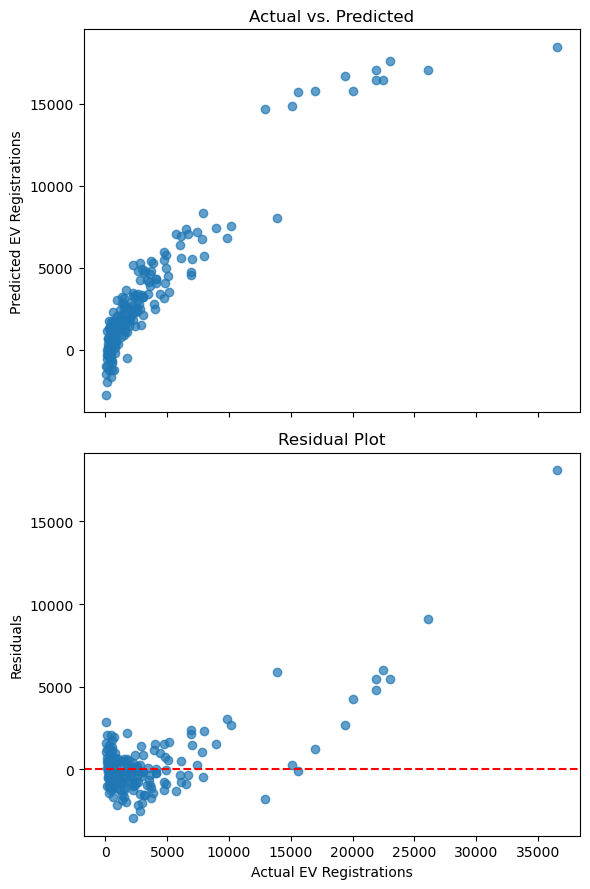

In [58]:
import matplotlib.pyplot as plt

# Predicted values
y_pred = lr.predict(X_test)
residuals = y_test - y_pred

# Create a single figure with two subplots (stacked vertically)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 9), sharex=True)

# Actual vs. Predicted Plot
axes[0].scatter(y_test, y_pred, alpha=0.7)
axes[0].set_ylabel('Predicted EV Registrations')
axes[0].set_title('Actual vs. Predicted')

# Residual Plot
axes[1].scatter(y_test, residuals, alpha=0.7)
axes[1].axhline(0, color='red', linestyle='--')
axes[1].set_xlabel('Actual EV Registrations')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residual Plot')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


* As we can see, the model systematically under estimates for larger values

In [41]:
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Residual': residuals
}).reset_index(drop=True)

results['Absolute Residual'] = results['Residual'].abs()
results = results.sort_values(by='Absolute Residual', ascending=False)
print(results.head(10))

     Actual     Predicted      Residual  Absolute Residual
115   36574  18468.020298  18105.979702       18105.979702
56    26128  17040.051312   9087.948688        9087.948688
104   22498  16471.348244   6026.651756        6026.651756
63    13922   8007.438502   5914.561498        5914.561498
124   21919  16441.543059   5477.456941        5477.456941
164   23030  17572.089090   5457.910910        5457.910910
144   21888  17077.995044   4810.004956        4810.004956
62    20017  15741.389905   4275.610095        4275.610095
57     9832   6809.762174   3022.237826        3022.237826
2      2229   5184.600163  -2955.600163        2955.600163


* Does penalization help? Somewhat, but probably not enough to warrant adding this to the presentation

In [43]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Ridge Regression
ridge = Ridge(alpha=1.0, max_iter=5000)  # Alpha controls the strength of regularization
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Evaluate Ridge Regression
ridge_mae = mean_absolute_error(y_test, y_pred_ridge)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)

# Lasso Regression
lasso = Lasso(alpha=0.1, max_iter=5000)  # Alpha controls the strength of regularization
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Evaluate Lasso Regression
lasso_mae = mean_absolute_error(y_test, y_pred_lasso)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_r2 = r2_score(y_test, y_pred_lasso)

{
    "Ridge Regression": {
        "MAE": ridge_mae,
        "MSE": ridge_mse,
        "R2": ridge_r2
    },
    "Lasso Regression": {
        "MAE": lasso_mae,
        "MSE": lasso_mse,
        "R2": lasso_r2
    }
}


{'Ridge Regression': {'MAE': 1180.0939915469633,
  'MSE': 4701917.439467263,
  'R2': 0.8417170881761846},
 'Lasso Regression': {'MAE': 1158.52238861471,
  'MSE': 4465570.270308316,
  'R2': 0.8496733567873223}}

In [59]:
# Get feature names and coefficients
lasso_coefficients = pd.DataFrame({
    'Feature': preprocessor.get_feature_names_out(),
    'Coefficient': lasso.coef_
})

# Filter non-zero coefficients
important_features = lasso_coefficients[lasso_coefficients['Coefficient'] != 0]

# Sort by absolute value of coefficients
important_features['Absolute Coefficient'] = important_features['Coefficient'].abs()
important_features = important_features.sort_values(by='Absolute Coefficient', ascending=False)

print(important_features.head(10))

                                              Feature   Coefficient   
36                          cat__Region_New York City  13000.445377  \
41                           cat__Region_White Plains   4430.080038   
35                                 cat__Region_Nassau   4035.104195   
9          num__Brent Crude Oil Spot Price ($/barrel)   2831.370334   
37                              cat__Region_Rochester   2648.496193   
7   num__NY Ultra-Low Sulfur Diesel Spot Price ($/...  -2542.145941   
19                    num__Region Diesel Cost ($/gal)   2364.331019   
18                       num__Region Gas Cost ($/gal)  -2308.841796   
27                                cat__Region_Batavia  -1963.658478   
26                                 cat__Region_Albany   1647.386451   

    Absolute Coefficient  
36          13000.445377  
41           4430.080038  
35           4035.104195  
9            2831.370334  
37           2648.496193  
7            2542.145941  
19           2364.331019  
18

/var/folders/rj/9p72k2_n4n5dp_xbmdt7ygdc0000gn/T/ipykernel_3944/1488081104.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  important_features['Absolute Coefficient'] = important_features['Coefficient'].abs()


### Decision Tree

In [65]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train a Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Evaluate the Decision Tree model
dt_mae = mean_absolute_error(y_test, y_pred_dt)
dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_r2 = r2_score(y_test, y_pred_dt)

# Display the results of the initial Decision Tree model
initial_results = {
    "Decision Tree Initial Performance": {
        "MAE": dt_mae,
        "MSE": dt_mse,
        "R²": dt_r2
    }
}

# Perform Grid Search for Hyperparameter Tuning
param_grid = {
    'max_depth': [3, 10, 13, 15, 17, None],
    'min_samples_split': [2, 3, 5, 6, 7, 8, 12],
    'min_samples_leaf': [1, 2, 3, 4]
}

grid_search = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42), 
                           param_grid=param_grid, 
                           scoring='r2', 
                           cv=5, 
                           n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best hyperparameters from Grid Search
best_params = grid_search.best_params_

# Evaluate the best model
best_dt = grid_search.best_estimator_
y_pred_best_dt = best_dt.predict(X_test)

best_dt_mae = mean_absolute_error(y_test, y_pred_best_dt)
best_dt_mse = mean_squared_error(y_test, y_pred_best_dt)
best_dt_r2 = r2_score(y_test, y_pred_best_dt)

# Display the results of the tuned Decision Tree model
tuned_results = {
    "Decision Tree Tuned Performance": {
        "MAE": best_dt_mae,
        "MSE": best_dt_mse,
        "R²": best_dt_r2
    },
    "Best Hyperparameters": best_params
}

{**initial_results, **tuned_results}


{'Decision Tree Initial Performance': {'MAE': 998.8418079096045,
  'MSE': 4387061.192090396,
  'R²': 0.8523162457076228},
 'Decision Tree Tuned Performance': {'MAE': 992.9324703965871,
  'MSE': 4209996.703635765,
  'R²': 0.8582768528799105},
 'Best Hyperparameters': {'max_depth': 15,
  'min_samples_leaf': 1,
  'min_samples_split': 7}}

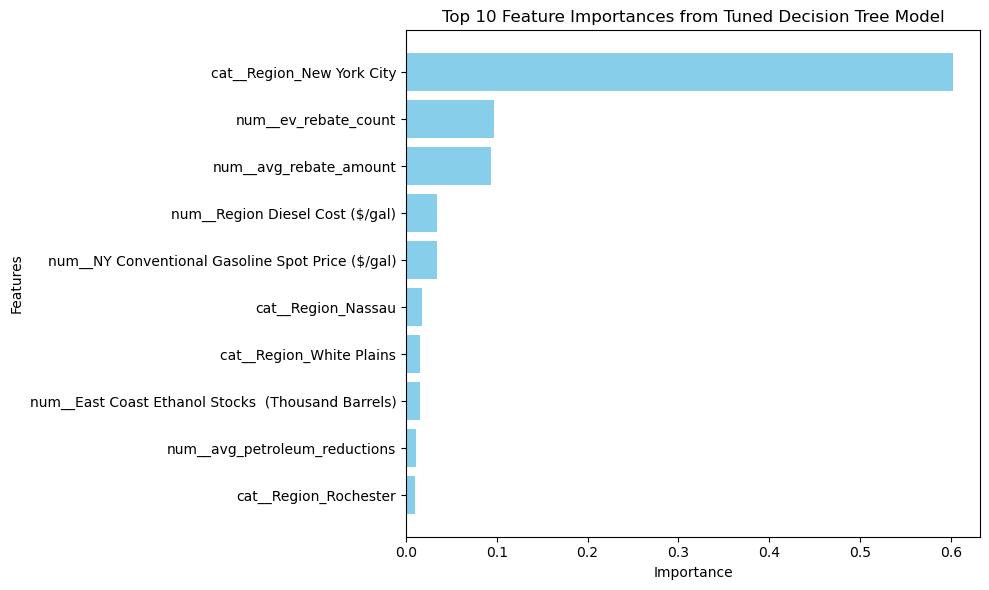

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

features = feature_names

# Train a Decision Tree Regressor (re-initialize if necessary)
from sklearn.tree import DecisionTreeRegressor
best_dt = DecisionTreeRegressor(max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42)
best_dt.fit(X_train, y_train)

# Extract feature importances
feature_importances = best_dt.feature_importances_

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'].head(10), importance_df['Importance'].head(10), color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances from Tuned Decision Tree Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.tight_layout()
plt.show()

## Random Forest

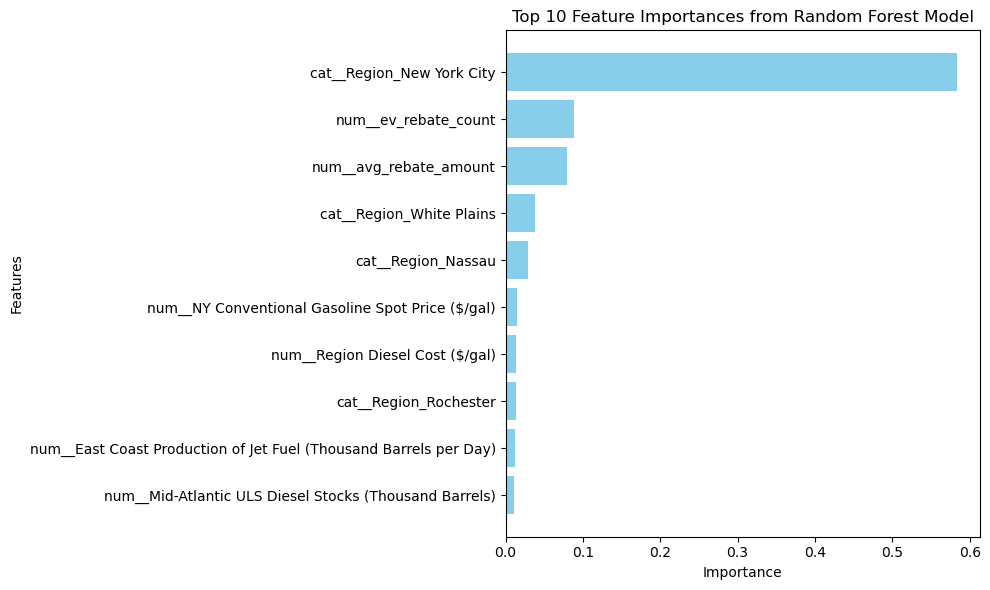

In [79]:
feature_importances = rfr.feature_importances_
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'].head(10), importance_df['Importance'].head(10), color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances from Random Forest Model')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()
plt.show()

## Neural Network

In [80]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mlp = MLPRegressor(
    hidden_layer_sizes=(100, 50),  
    activation='relu',            
    solver='adam',                
    max_iter=10000,               
    random_state=42              
)

mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
print("\nNeural Network Regressor Performance:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_mlp):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_mlp):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred_mlp):.2f}")


Neural Network Regressor Performance:
Mean Absolute Error (MAE): 703.14
Mean Squared Error (MSE): 1605178.77
R² Score: 0.95
